In [104]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt
import math as m

In [105]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [106]:
func = lambda x: 0.5 * np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ ( A @ x - b)
grad_2 = lambda x: A.T @ A

In [107]:
L = np.amax(np.linalg.eigh(A.T @ A)[0])

In [113]:
def Fast_grad_Nest(x0, func, grad, L, steps):
    xk = x0.copy()
    res = [func(xk)]
    alf = 0
    yk = xk
    for i in range(steps):
        alf_prev = alf
        alf = (1 + m.sqrt(1 + 4 * alf**2)) / 2
        tet = (1 - alf_prev) / alf
        yk_prev = yk
        yk = xk - 1 / L * grad(xk)
        xk = (1 - tet) * yk + tet * yk_prev
        res.append(func(xk))
    return xk, res

In [120]:
xk, res = Fast_grad_Nest(x0, func, grad, L, 2000)

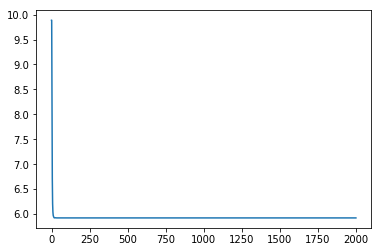

In [121]:
plt.plot(np.log(res))
plt.show()